# Project description: 6 Analysis of the ad dataset

Preparation of the dataset for the further analysis.

Calculate the average amount of views and clicks for the entire period. 

Plot the distribution of views per ad for the entire period.

Calculate the rolling average with the step 2. What was the rolling average on 6 of April 2019? 

Plot two distributions on one plot: mean value per day and rolling average of views. 

Find the day with the greatest difference in modulus between the mean value and the rolling average.

Find the average number of days between the date of creation of the ad account and the first
launch of the ad by this customer.

Calculate the conversion for the period of 365 days starting from the date of registration.

Find and plot the distribution of clints by timedelta between time of registration and the 
launch of the ad.

In [74]:
# Preparation of the datasets for the further analysis.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ads_data = pd.read_csv('c:\\ads_data.csv')
add_clients = pd.read_csv('c:\\ads_clients_data.csv')    

In [66]:
# Taking a look at the datasets:

ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [5]:
add_clients.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


In [28]:
# Calculation of values of views and clicks per ad_id.

number_per_ad_per_event = ads_data.groupby(['ad_id', 'event'], as_index=False) \
        .agg({'time': 'count'}) \
        .rename(columns={'time': 'event_number'})

number_per_ad_per_event.head()

,ad_id,event,event_number
0,2,click,1
1,2,view,101
2,3,click,3
3,3,view,184
4,1902,click,1


In [21]:
pivot_per_ad_events = number_per_ad_per_event.pivot(index='ad_id', 
                              columns='event', 
                              values='event_number') \
                                .fillna(0)

pivot_per_ad_events.head()

event,click,view
ad_id,,
2,1.0,101.0
3,3.0,184.0
1902,1.0,41.0
2064,0.0,35.0
2132,1.0,58.0


In [23]:
# Calculation of the average amount of views and clicks for the entire period.

pivot_per_ad_events.mean().round()

event
click    113.0
view     923.0
dtype: float64

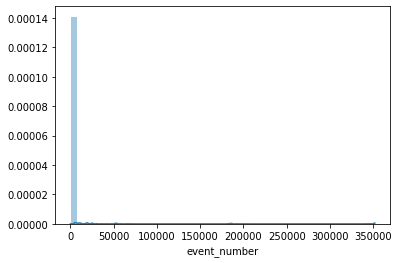

In [35]:
# Plotting the distribution of views per ad for the entire period.

views_per_ad = number_per_ad_per_event \
    .query('event == "view"')

sns.distplot(views_per_ad.event_number)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


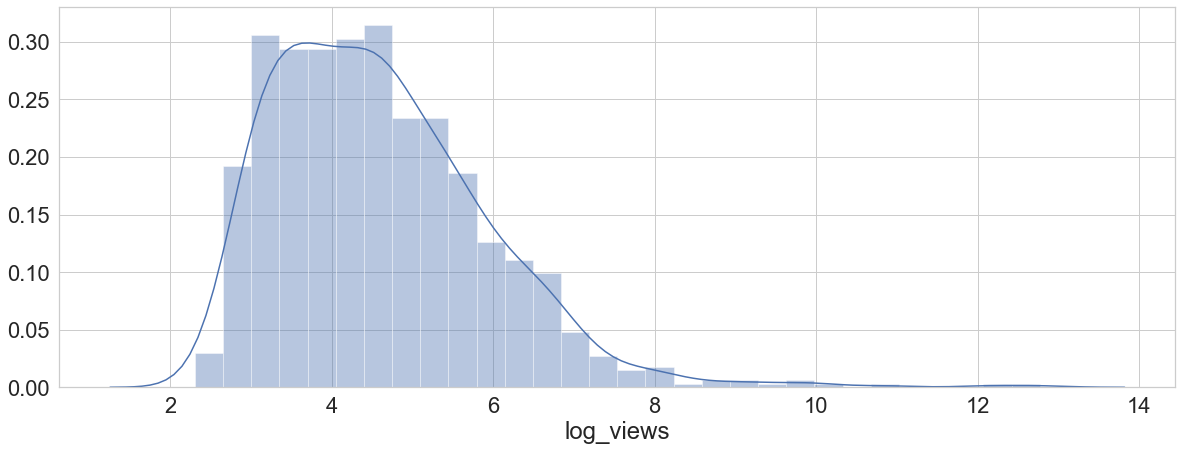

In [40]:
# Prettyfying the plot:

sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize': (20,7)}
        )

views_per_ad['log_views'] = np.log(views_per_ad.event_number)

sns.distplot(views_per_ad.log_views)

In [44]:
# Calculation of mean values of ad views per date.

ads_view_per_date = ads_data \
                    .query('event == "view"') \
                    .pivot_table(index='ad_id',
                                columns='date',
                                values='time',
                                aggfunc='count') \

mean_views = ads_view_per_date.mean()

mean_views

date
2019-04-01    154.482270
2019-04-02    137.786982
2019-04-03    163.952778
2019-04-04    675.901720
2019-04-05    919.109677
2019-04-06    277.122727
dtype: float64

In [46]:
# Calculation of the rolling average of the ad views with the window (step) 2.

rolling_views = mean_views.rolling(2).mean()

rolling_views

date
2019-04-01           NaN
2019-04-02    146.134626
2019-04-03    150.869880
2019-04-04    419.927249
2019-04-05    797.505699
2019-04-06    598.116202
dtype: float64

In [48]:
 # What was the rolling average on 6 of April 2019?

rolling_views['2019-04-06'].round()

598.0

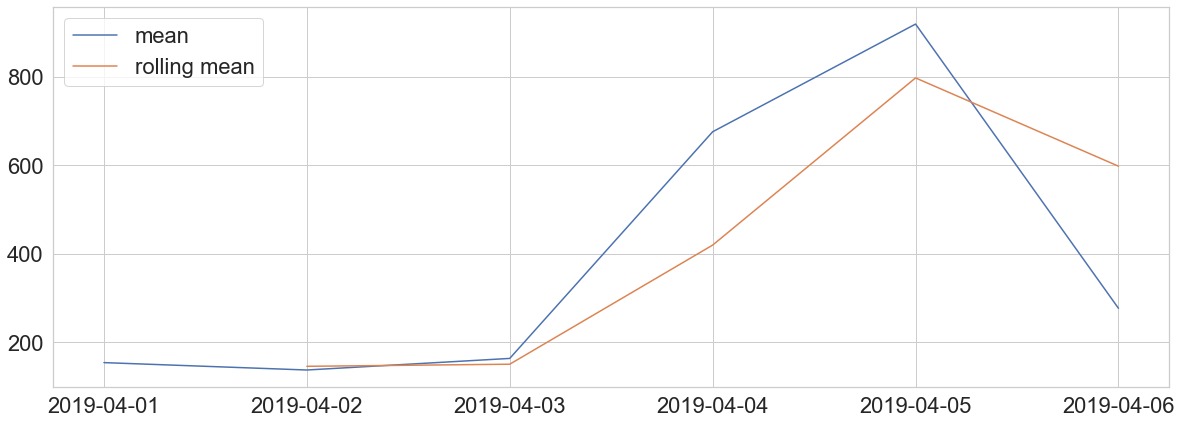

In [52]:
# Building the two distributions on the same plot: mean value per day and rolling average of views.

sns.lineplot(data=mean_views, label='mean')
sns.lineplot(data=rolling_views, label='rolling mean')

In [59]:
'''Find the day(anomaly) with the greatest difference in modulus between the mean value and the 
rolling average.'''

anomaly_day = mean_views.subtract(rolling_views)\
            .abs() \
            .idxmax()

anomaly_day

'2019-04-06'

In [77]:
# Finding the average number of days between the date of creation of the ad account and the first
# launch of the ad by this customer.

full_data = ads_data.merge(add_clients.drop(columns=['date', 'community_id']))

full_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,create_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04


In [79]:
full_data[['date', 'create_date']] = full_data[['date', 'create_date']].apply(pd.to_datetime)

full_data.groupby('client_union_id') \
        .apply(lambda group: group.date - group.create_date)

client_union_id        
1                479032   98 days
                 479033   98 days
                 479034   98 days
                 479035   98 days
                 479036   98 days
                            ...  
122078           999542   72 days
                 999543   72 days
                 999544   72 days
                 999545   72 days
                 999546   72 days
Length: 1000000, dtype: timedelta64[ns]

In [82]:
'''Min difference will be the difference between the creation of the customers account and the launch 
of the 1st ad.'''

full_data.groupby('client_union_id') \
        .apply(lambda group: (group.date - group.create_date).min()).mean()

Timedelta('124 days 09:04:43.532219')

In [89]:
'''Calculation of the conversion rate (for the period of 365 days starting from the date of 
registration):'''

delta = pd.to_timedelta('365d')
delta

Timedelta('365 days 00:00:00')

In [103]:
difference = full_data \
                .groupby('client_union_id') \
                .apply(lambda group: (group.date - group.create_date).min())

creation_delta = difference.loc[difference < delta]

creation_delta.head(3)

client_union_id
1     98 days
9    114 days
13    66 days
dtype: timedelta64[ns]

In [100]:
# add_clients contains the info about all the customers:

add_clients.client_union_id.nunique()

122078

In [107]:
conversion_rate = round(difference.shape[0] / add_clients.client_union_id.nunique() * 100,2)

conversion_rate

0.69

In [109]:
'''Find and plot the distribution of clints by timedelta between the registration and the launch of 
the ad.'''

bins = pd.to_timedelta([0, 30, 90, 180, 365], unit='d')

pd.cut(difference, bins = bins)

client_union_id
1         (90 days 00:00:00, 180 days 00:00:00]
9         (90 days 00:00:00, 180 days 00:00:00]
13         (30 days 00:00:00, 90 days 00:00:00]
16        (90 days 00:00:00, 180 days 00:00:00]
20         (30 days 00:00:00, 90 days 00:00:00]
                          ...                  
122004     (30 days 00:00:00, 90 days 00:00:00]
122013    (90 days 00:00:00, 180 days 00:00:00]
122023    (90 days 00:00:00, 180 days 00:00:00]
122031    (90 days 00:00:00, 180 days 00:00:00]
122078     (30 days 00:00:00, 90 days 00:00:00]
Length: 838, dtype: category
Categories (4, interval[timedelta64[ns]]): [(0 days 00:00:00, 30 days 00:00:00] < (30 days 00:00:00, 90 days 00:00:00] < (90 days 00:00:00, 180 days 00:00:00] < (180 days 00:00:00, 365 days 00:00:00]]

In [118]:
distribution = pd.cut(difference,
       bins = bins,
      labels=['0-30', '30-90', '90-180', '180-360']) \
    .value_counts()

distribution

90-180     396
30-90      263
180-360    168
0-30        11
dtype: int64

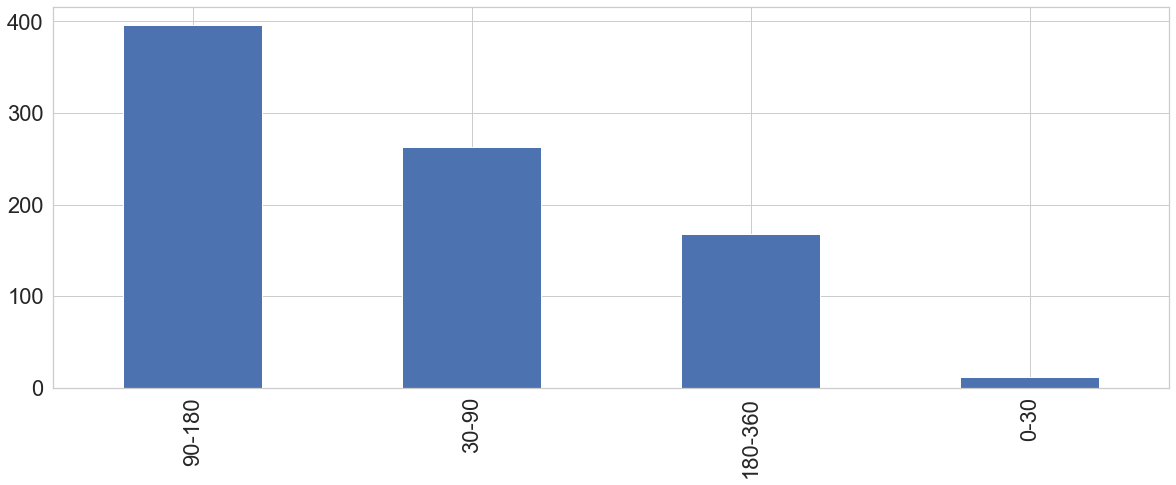

In [143]:
# Plotting the distribution of clints by timedelta:

distribution.plot(kind='bar')